## Flipkart Reviews Sentiment Analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [38]:
df = pd.read_csv(r'flipkart.csv')


In [39]:
df = df.rename(columns={'Unnamed: 0': 'Id'})


In [40]:
df

,Id,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


In [32]:
print(df.shape)


(2304, 4)


In [8]:
df = df.head(500)
print(df.shape)


(500, 4)


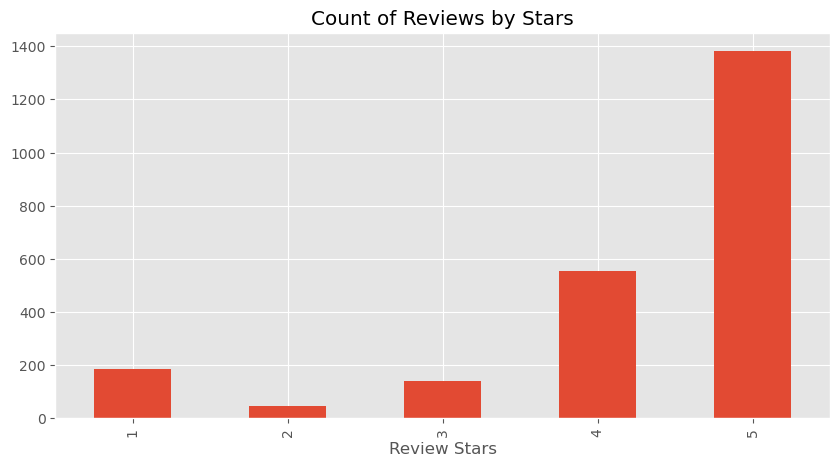

In [6]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


## Taking one sample review message

In [7]:
example = df['Review'][3]

print(example)


My wife is so happy and best product 👌🏻😘


In [8]:
tokens = nltk.word_tokenize(example)
tokens

['My', 'wife', 'is', 'so', 'happy', 'and', 'best', 'product', '👌🏻😘']

In [9]:
tagged = nltk.pos_tag(tokens)
tagged


[('My', 'PRP$'),
 ('wife', 'NN'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('happy', 'JJ'),
 ('and', 'CC'),
 ('best', 'JJS'),
 ('product', 'NN'),
 ('👌🏻😘', 'NN')]

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  My/PRP$
  wife/NN
  is/VBZ
  so/RB
  happy/JJ
  and/CC
  best/JJS
  product/NN
  👌🏻😘/NN)


## 1. VADER Sentiment Scoring

This uses a "bag of words" approach:
1. Stop words are removed
2. Each word is scored and combined to a total score.

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

### Testing with a simple example from the dataset

In [24]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [25]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

### Testing with a one review example

In [72]:
sia.polarity_scores(example)


{'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.8808}

In [41]:
res = {}
for i, row in df.iterrows():
    text = str(row['Review'])  # Replace 'Review' with your actual text column
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


In [42]:
# Convert results to DataFrame and merge
vaders = pd.DataFrame.from_dict(res, orient='index').reset_index()
vaders.rename(columns={'index': 'Id'}, inplace=True)



In [43]:
vaders.rename(columns={
    'neg': 'vader_neg',
    'neu': 'vader_neu',
    'pos': 'vader_pos',
    'compound': 'vader_compound'
}, inplace=True)


In [44]:
merged_df = vaders.merge(df, on='Id', how='left')

In [45]:
merged_df


,Id,vader_neg,vader_neu,vader_pos,vader_compound,Product_name,Review,Rating
0,0,0.073,0.613,0.314,0.9579,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,0.000,0.256,0.744,0.4404,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,0.000,0.881,0.119,0.5789,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,0.000,0.432,0.568,0.8808,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,0.000,0.533,0.467,0.8360,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...,...,...,...,...,...
2299,2299,0.000,0.631,0.369,0.6249,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,2300,0.000,0.745,0.255,0.6249,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,0.000,0.000,1.000,0.6249,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,0.000,1.000,0.000,0.0000,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


## VADER results

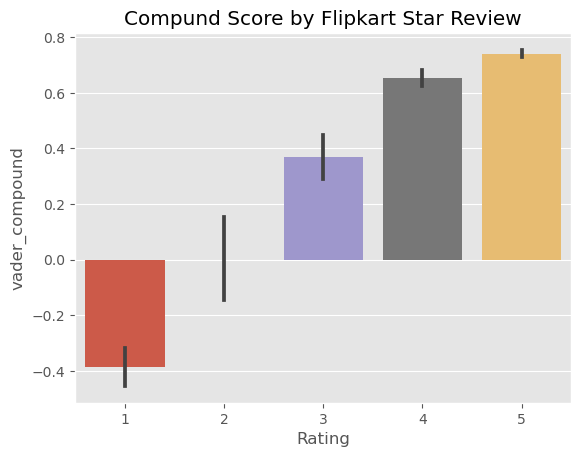

In [73]:
ax = sns.barplot(data=merged_df, x='Rating', y='vader_compound')
ax.set_title('Compund Score by Flipkart Star Review')
plt.show()


## Insights

1. **Positive Correlation:** There seems to be a positive correlation between the star ratings and the VADER compound sentiment scores. As the star ratings increase, so does the average compound score. This indicates that higher-rated reviews tend to have more positive language.

2. **Negative Sentiment for 1-Star Reviews:** The 1-star reviews have an average negative compound score, which is expected as these reviews typically express negative sentiments about the product or service.

3. **Neutral Sentiment for Mid-Scale Ratings:** The 2 and 3-star ratings have compound scores closer to zero but are still on the positive side, suggesting mixed feedback that leans towards the negative for 2-star and neutral to slightly positive for 3-star ratings.

4. **Increasingly Positive Sentiment for High Ratings:** For 4 and 5-star ratings, the compound scores are positive, with 5-star ratings having the highest positive score. This reflects a strong positive sentiment in these reviews.



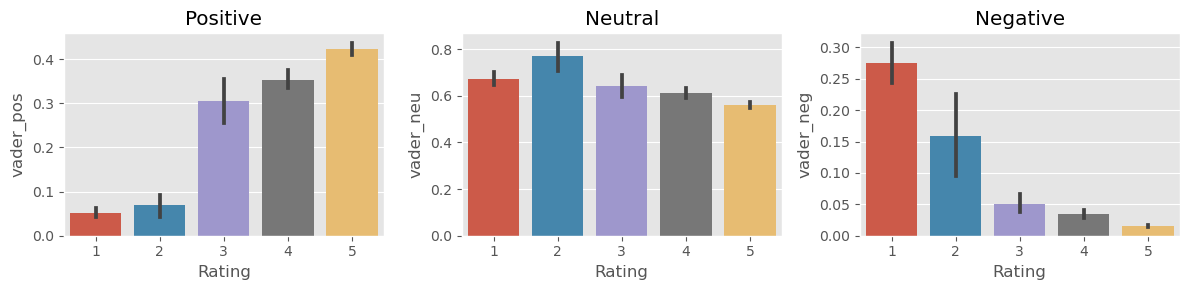

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=merged_df, x='Rating', y='vader_pos', ax=axs[0])
sns.barplot(data=merged_df, x='Rating', y='vader_neu', ax=axs[1])
sns.barplot(data=merged_df, x='Rating', y='vader_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


## Insights 

1. **Positive Sentiment Distribution:**
The Positive plot shows that the average positive sentiment scores increase with higher star ratings. This is most apparent in the jump from 4-star to 5-star ratings, where the positive sentiment is the strongest. This aligns with expectations as higher star ratings should correlate with more positive language in the reviews.

2. **Neutral Sentiment Distribution:**
The Neutral plot does not show a strong correlation with the star ratings. The neutral scores are relatively even across all star ratings, with slight variations. This could suggest that regardless of the overall sentiment (positive or negative), reviewers may still use a significant amount of neutral language, or it could be indicative of VADER's sensitivity to language that it deems neutral.

3. **Negative Sentiment Distribution:**
Th Negative plot shows that the average negative sentiment scores are highest for 1-star ratings and decrease as the star ratings get higher. This is what we would expect in the normal circummstances.

4. **Error Bars:**
Error bars on the 1-star ratings for negative sentiment are quite high, which might indicate that some 1-star reviews have lower negative sentiment than others, possibly due to the presence of sarcasm or mixed feelings that VADER may interpret differently.ly.nt

## 2. TextBlob Sentiment Scoring

In [74]:
import pandas as pd
from textblob import TextBlob
from tqdm.auto import tqdm


In [76]:
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Add columns to store sentiment
merged_df['TextBlob_polarity'] = 0.0
merged_df['TextBlob_subjectivity'] = 0.0


In [78]:

# Apply TextBlob sentiment analysis
for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    sentiment = get_textblob_sentiment(row['Review'])  # Replace 'Text' with your actual text column
    merged_df.at[i, 'TextBlob_polarity'] = sentiment.polarity
    merged_df.at[i, 'TextBlob_subjectivity'] = sentiment.subjectivity




  0%|          | 0/2304 [00:00<?, ?it/s]

In [79]:
merged_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,Product_name,Review,Rating,TextBlob_polarity,TextBlob_subjectivity
0,0,0.073,0.613,0.314,0.9579,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,0.438788,0.472424
1,1,0.000,0.256,0.744,0.4404,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5,0.700000,0.600000
2,2,0.000,0.881,0.119,0.5789,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,0.183333,0.666667
3,3,0.000,0.432,0.568,0.8808,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5,0.900000,0.650000
4,4,0.000,0.533,0.467,0.8360,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5,0.534091,0.763636
...,...,...,...,...,...,...,...,...,...,...
2299,2299,0.000,0.631,0.369,0.6249,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5,0.600000,0.691667
2300,2300,0.000,0.745,0.255,0.6249,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5,0.625000,0.666667
2301,2301,0.000,0.000,1.000,0.6249,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5,1.000000,1.000000
2302,2302,0.000,1.000,0.000,0.0000,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5,0.000000,1.000000


In [81]:
merged_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'Product_name', 'Review', 'Rating', 'TextBlob_polarity',
       'TextBlob_subjectivity'],
      dtype='object')

## Combining and comparing the two models

In [84]:
import warnings

# Filter FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


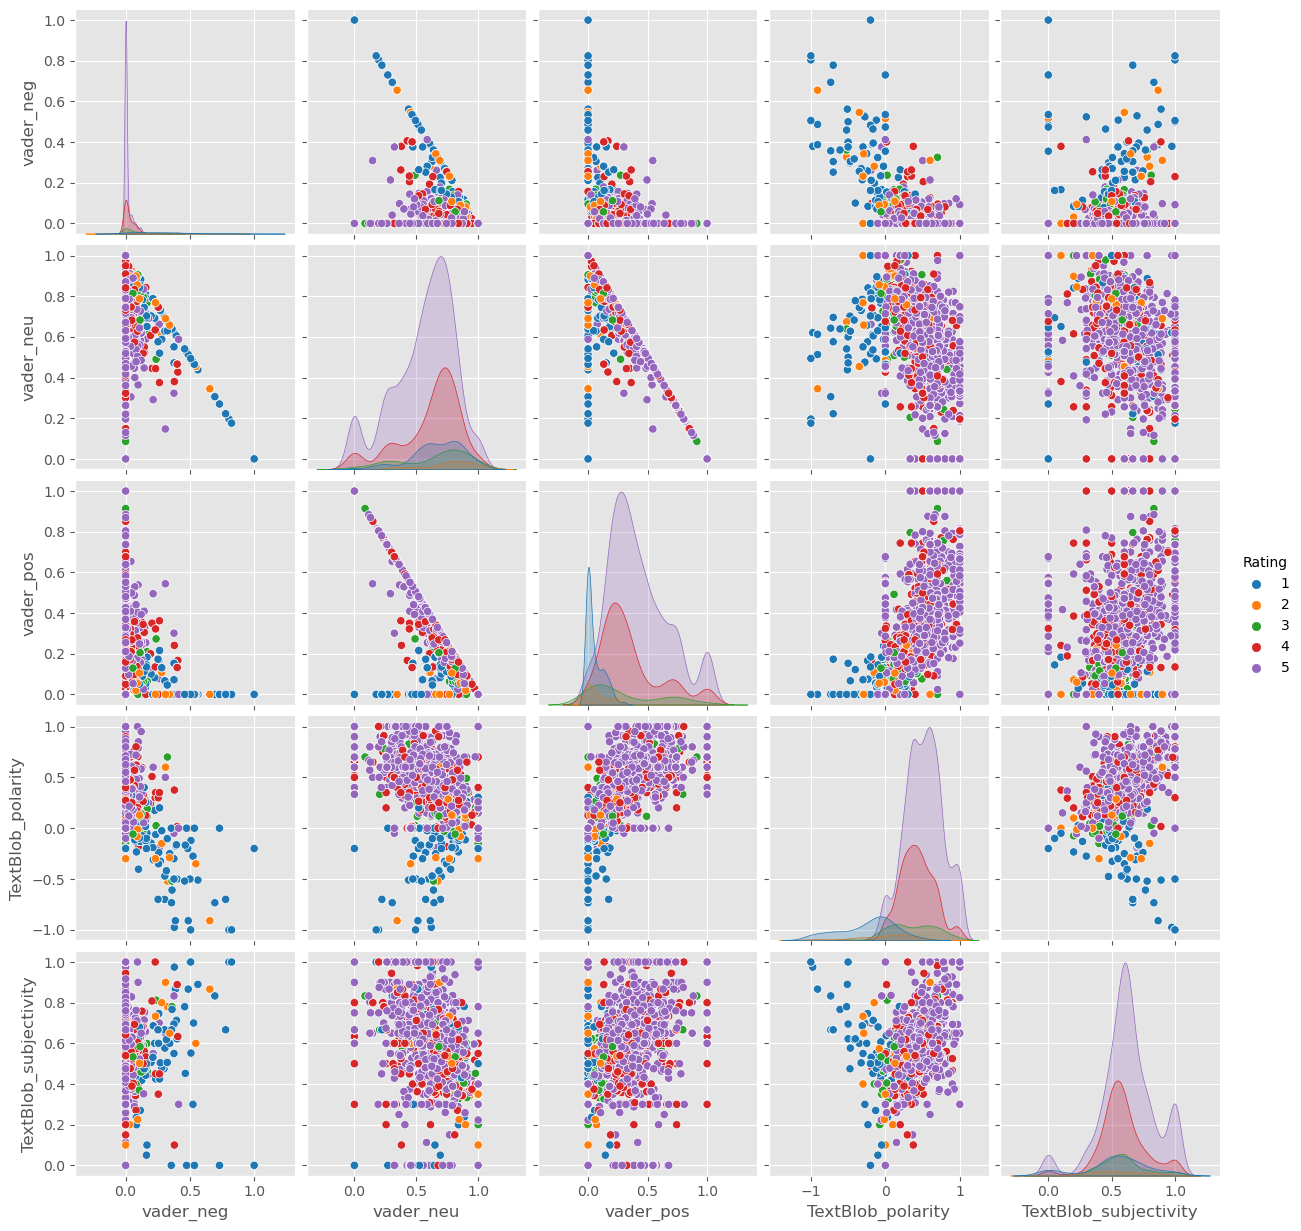

In [85]:
sns.pairplot(data=merged_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'TextBlob_polarity', 'TextBlob_subjectivity'],
            hue='Rating',
            palette='tab10')
plt.show()

## Insights

1. **Correlation Between Metrics:**

Negative sentiment (vader_neg) seems to have a negative correlation with positive sentiment (vader_pos) and TextBlob polarity. This is expected because as the sentiment of a review becomes more negative, it's less likely to have positive sentiment and a higher polarity score.
TextBlob polarity also appears positively correlated with VADER positive sentiment, which suggests that both tools generally agree on what constitutes positive sentiment.

2. **Distribution of Sentiment Scores by Rating:**

Reviews with higher star ratings (4 and 5) tend to cluster towards higher VADER positive sentiment scores and TextBlob polarity, and away from VADER negative sentiment.
Lower star ratings (1 and 2) show the opposite trend, with higher VADER negative sentiment and lower positive sentiment and TextBlob polarity scores.

3. **Subjectivity of Reviews:**

The TextBlob subjectivity score does not show a clear pattern with respect to star ratings. This could indicate that the subjectivity/objectivity of a review is not strongly associated with its perceived positivity or negativity.

4. **Density Distributions:**

The density plots on the diagonal show the distribution of each sentiment metric. VADER negative sentiment has a significant peak at 0, indicating that many reviews have no detected negative sentiment.
VADER positive sentiment and TextBlob polarity also have peaks near 0 but show a more even distribution across the range, especially for higher star ratings.

5. **Variance in Sentiment Analysis:**

There seems to be a considerable overlap in sentiment scores among different ratings, especially in the neutral and subjective scores, which might suggest that using these scores alone might not always be sufficient to accurately determine the star rating of a review.

6. **Rating-Specific Patterns:**

1-star and 2-star ratings tend to have higher negative sentiment scores. As you move towards 4-star and 5-star ratings, the positive sentiment and polarity increase.
The pair plots also indicate that neutral sentiment (vader_neu) is less distinctive across different ratings, showing a high density of points across all ratings with a slight decrease as the positive sentiment increases.


In [87]:
# Convert results to a DataFrame

results_df = pd.DataFrame(merged_df)


In [88]:
# Save the results to a CSV file
results_df.to_csv('Final_output.csv', index=False)

print("Output saved to Final_output.csv")

Output saved to Final_output.csv


## My Final Conclusions


After conducting an extensive analysis of sentiment metrics from VADER and TextBlob and their relationship to star ratings, I conclude that sentiment analysis is a valuable tool in predicting user ratings. My visual and statistical assessments indicate a strong positive correlation between high sentiment scores and high user ratings. This correlation validates the effectiveness of sentiment analysis as a predictive feature for modeling user review ratings.

However, the data also reveals that sentiment is a complex and nuanced attribute of user reviews, which presents both challenges and opportunities for model development. The overlap of sentiment scores across different ratings suggests that while sentiment analysis can significantly inform our predictions, relying solely on these metrics may not capture the full breadth of user opinions.